In [101]:
import numpy as np
from itertools import combinations
from pandas import DataFrame
from IPython.display import display
from statistics import variance
from scipy.stats import t, f, norm
import matplotlib.pyplot as plt

## coletando as variaveis do usuarios 

In [102]:
#region
print('MÉTODO ESCOLHIDO: PLANEJAMENTO EXPERIMENTAL DDC - DELINEAMENTO COMPOSTO CENTRAL')
fatores = int(input('\nO modelo possui quantas variáveis? '))
replicadas = int(input('Existem quantas replicatas do ponto central? '))

alfa = 0.05
mult = 2

combvariaveis = list()

MÉTODO ESCOLHIDO: PLANEJAMENTO EXPERIMENTAL DDC - DELINEAMENTO COMPOSTO CENTRAL


## gerando as combinacoes de variaveis 

In [103]:
for aux1 in range(2, fatores + 1):
    combinacoes = list()
    for aux2 in range(1, fatores + 1):
        combinacoes.append(aux2)
    combvariaveis.append(list(combinations(combinacoes, aux1)))


[] descubrie para que serve sssas variaveis 

In [104]:
ind_comb1 = 0
ind_comb2 = 0
cont_comb = 0

### definindo a estrutura da matriz X

In [105]:
lim_comb = combvariaveis[ind_comb2].__len__()
# quantidade de esperimentos == linhas
linx = 2 ** fatores + replicadas
# quantidade de betas 
colx = 2 ** fatores

matx = np.ones((linx, colx), dtype=int)
matx

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]])

### Preenchimento da Matriz X (Replicatas, Coluna 2, Última Coluna e Variáveis)

In [106]:
# Preenchimento da Matriz X (Replicatas, Coluna 2, Última Coluna e Variáveis)
for coluna in range(1, colx):
    # Necessário para Colunas das variáveis
    imparpar = 0
    for linha in range(0, linx):

        # 'Replicatas do ponto central'
        if linha >= linx - replicadas:
            matx[linha, coluna] = 0

        # Coluna 2
        elif coluna == 1 and linha % 2 == 0:
            matx[linha, coluna] = -1

        # Colunas das variáveis
        elif coluna <= fatores and coluna != 1:
            if linha % mult == 0:
                imparpar += 1
                #print('Linha:', linha, '\n', 'Mult: ', mult, '\n', 'O valor do imparpar: ', imparpar, '\n')
            if imparpar % 2 == 1:
                matx[linha, coluna] = -1

        # Última Coluna
        elif coluna == colx - 1:
            ultcol = 0
            for ind_ultcol in range(1, fatores + 1):
                if matx[linha, ind_ultcol] == -1:
                    ultcol += 1
            if ultcol % 2 != 0:
                matx[linha, coluna] = -1

        # Combinação das Variáveis
        elif coluna > fatores:
            if coluna - fatores <= lim_comb:
                if cont_comb < 2 ** fatores:
                    cont_comb += 1
                    comb = combvariaveis[ind_comb2][ind_comb1]
                else:
                    ind_comb1 += 1
                    cont_comb = 1
                    comb = combvariaveis[ind_comb2][ind_comb1]
            else:
                ind_comb2 += 1
                ind_comb1 = 0
                cont_comb = 1
                lim_comb += combvariaveis[ind_comb2].__len__()
                comb = combvariaveis[ind_comb2][ind_comb1]
            valormult = 1
            for indcomb in range(0, comb.__len__()):
                valormult *= matx[linha, comb[indcomb]]
            # print('A multiplicação da combinação:', comb, 'na linha', linha, 'é', valormult)
            matx[linha, coluna] = valormult

    # Necessário para a Coluna das Variáveis
    if coluna <= fatores and coluna != 1:
        mult *= 2

matx

array([[ 1, -1, -1, -1,  1,  1,  1, -1],
       [ 1,  1, -1, -1, -1, -1,  1,  1],
       [ 1, -1,  1, -1, -1,  1, -1,  1],
       [ 1,  1,  1, -1,  1, -1, -1, -1],
       [ 1, -1, -1,  1,  1, -1, -1,  1],
       [ 1,  1, -1,  1, -1,  1, -1, -1],
       [ 1, -1,  1,  1, -1, -1,  1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0]])

### # imprimindo informacoes da matriz 

In [107]:

print('=-=' * 30, '\n')
# Informando o tamanho da Matriz X
print('A matriz X possui', linx, 'linhas e ', colx, 'colunas.\n')


=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-= 

A matriz X possui 12 linhas e  8 colunas.



### Imprimindo a Matriz X na tela

In [108]:
for linha in range(0, linx):
    for coluna in range(0, colx):
        print(f'[{matx[linha, coluna]:^3}]', end='')
    print()


[ 1 ][-1 ][-1 ][-1 ][ 1 ][ 1 ][ 1 ][-1 ]
[ 1 ][ 1 ][-1 ][-1 ][-1 ][-1 ][ 1 ][ 1 ]
[ 1 ][-1 ][ 1 ][-1 ][-1 ][ 1 ][-1 ][ 1 ]
[ 1 ][ 1 ][ 1 ][-1 ][ 1 ][-1 ][-1 ][-1 ]
[ 1 ][-1 ][-1 ][ 1 ][ 1 ][-1 ][-1 ][ 1 ]
[ 1 ][ 1 ][-1 ][ 1 ][-1 ][ 1 ][-1 ][-1 ]
[ 1 ][-1 ][ 1 ][ 1 ][-1 ][-1 ][ 1 ][-1 ]
[ 1 ][ 1 ][ 1 ][ 1 ][ 1 ][ 1 ][ 1 ][ 1 ]
[ 1 ][ 0 ][ 0 ][ 0 ][ 0 ][ 0 ][ 0 ][ 0 ]
[ 1 ][ 0 ][ 0 ][ 0 ][ 0 ][ 0 ][ 0 ][ 0 ]
[ 1 ][ 0 ][ 0 ][ 0 ][ 0 ][ 0 ][ 0 ][ 0 ]
[ 1 ][ 0 ][ 0 ][ 0 ][ 0 ][ 0 ][ 0 ][ 0 ]


In [109]:

# Continuidade do Programa

# Matriz Transposta
matxtranp = np.transpose(matx)
##tamanho = matxtranp.shape
matxtranp


array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [-1,  1, -1,  1, -1,  1, -1,  1,  0,  0,  0,  0],
       [-1, -1,  1,  1, -1, -1,  1,  1,  0,  0,  0,  0],
       [-1, -1, -1, -1,  1,  1,  1,  1,  0,  0,  0,  0],
       [ 1, -1, -1,  1,  1, -1, -1,  1,  0,  0,  0,  0],
       [ 1, -1,  1, -1, -1,  1, -1,  1,  0,  0,  0,  0],
       [ 1,  1, -1, -1, -1, -1,  1,  1,  0,  0,  0,  0],
       [-1,  1,  1, -1,  1, -1, -1,  1,  0,  0,  0,  0]])

### Matriz X^t*X

In [110]:
matx_t_x = np.matmul(matxtranp, matx)
tamanho = matx_t_x.shape
matx_t_x

array([[12,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8]])

### Matriz X^t*X a -1

In [111]:
matx_t_xinv = matx_t_x.astype(float)


In [112]:
tamanho = matx_t_xinv.shape


In [113]:
for linha in range(0, tamanho[0]):
    for coluna in range(0, tamanho[1]):
        if linha == coluna:
            matx_t_xinv[linha][coluna] = 1 / (matx_t_x[linha][coluna])
matx_t_xinv


array([[0.08333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.125     , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.125     , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.125     , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.125     ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.125     , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.125     , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.125     ]])

### gerando matris  Y

In [114]:

maty = np.zeros((linx, 1), dtype=float)
maty

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Leitura da Matriz Y

In [115]:
#maty = [[1.],[20.],[2.],[3.],[4.],[4.],[4.]]


print('\n')
for linha in range(0, linx):
    print("Insira o valor da linha", linha+1, "da Matriz Y: ")
    maty[linha][0] = input()





Insira o valor da linha 1 da Matriz Y: 
Insira o valor da linha 2 da Matriz Y: 
Insira o valor da linha 3 da Matriz Y: 
Insira o valor da linha 4 da Matriz Y: 
Insira o valor da linha 5 da Matriz Y: 
Insira o valor da linha 6 da Matriz Y: 
Insira o valor da linha 7 da Matriz Y: 
Insira o valor da linha 8 da Matriz Y: 
Insira o valor da linha 9 da Matriz Y: 
Insira o valor da linha 10 da Matriz Y: 
Insira o valor da linha 11 da Matriz Y: 
Insira o valor da linha 12 da Matriz Y: 


In [116]:

# Cálculo da Matriz X^t * Y
matx_t_y = np.matmul(matxtranp, maty)


In [117]:
# Cálculo dos Betas
matbetas = np.matmul(matx_t_xinv, matx_t_y)

In [148]:
# display(matbetas)
# display(matbetas.size)
# display(combvariaveis)
# display(combvariaveis[0] )
# display(combvariaveis[1] )
combvariaveis2 = list()
for i in range(fatores+1):
    combvariaveis2.append([i])

for i in combvariaveis:
    display(i)
    display("====")
    for e in i:
        display(e) 
        combvariaveis2.append(e)
# combvariaveis2.insert(combvariaveis[1])
display(combvariaveis2)



[(1, 2), (1, 3), (2, 3)]

'===='

(1, 2)

(1, 3)

(2, 3)

[(1, 2, 3)]

'===='

(1, 2, 3)

[[0], [1], [2], [3], (1, 2), (1, 3), (2, 3), (1, 2, 3)]

In [137]:
# Matriz Beta^t
matbetas_t = np.transpose(matbetas)

In [138]:

# Valor de Beta^t * X^t * Y
matbetas_t_x_t_y = np.matmul(matbetas_t, matx_t_y)

In [139]:

# Calculo da variância dos pontos centrais
pntcentrais = []
for i in range(colx, linx):
    pntcentrais.append(maty[i, 0])

varian = np.sqrt(variance(pntcentrais) * matx_t_xinv)

In [140]:
er = []
for lin in range(tamanho[0]):
    for col in range(tamanho[1]):
        if lin == col:
            er.append(varian[lin][col])

In [147]:
# Montagem da Tabela de Significância dos Betas
matb = matbetas.ravel()
tam_matb = matb.size
tcalc = (matb - 0) / er
tintervalo = t.interval(1 - alfa, linx - tam_matb)
tcrit = tintervalo[1]

t_pvalor_bc = []
for i in range(tam_matb):
    if matb[i] >= 0:
        t_pvalor_bc.append(2 * t.sf(tcalc[i], tam_matb - 1))
    else:
        t_pvalor_bc.append(2 * t.cdf(tcalc[i], tam_matb - 1))

t_aceitacao = []
for i in range(tam_matb):
    if t_pvalor_bc[i] < alfa:
        t_aceitacao.append("Aceita-se H0")
    else:
        t_aceitacao.append("Rejeita-se H0")

tab_signbeta = DataFrame(
    {
        'indexx':combvariaveis2,
        'B   ': matb,
        'er   ': er,
        'H0': 0,
        '     t[(B - H0)/er]': tcalc,
        't crítico': tcrit,
        '  Análise da Hipótese': t_aceitacao,
        'p-valor': t_pvalor_bc
    }
)

print('\nTABELA DE SIGNIFICÂNCIA DOS BETAS\n', '=-=' * 30)
display('\n', tab_signbeta)


TABELA DE SIGNIFICÂNCIA DOS BETAS
 =-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=


'\n'

,indexx,B,er,H0,t[(B - H0)/er],t crítico,Análise da Hipótese,p-valor
0,0,5.00,0.166667,0,30.000000,2.776445,Aceita-se H0,1.178847e-08
1,1,0.00,0.204124,0,0.000000,2.776445,Rejeita-se H0,1.000000e+00
2,2,0.00,0.204124,0,0.000000,2.776445,Rejeita-se H0,1.000000e+00
3,3,0.75,0.204124,0,3.674235,2.776445,Aceita-se H0,7.919782e-03
4,"(1, 2)",0.25,0.204124,0,1.224745,2.776445,Rejeita-se H0,2.602827e-01
5,"(1, 3)",-0.50,0.204124,0,-2.449490,2.776445,Aceita-se H0,4.414028e-02
6,"(2, 3)",0.00,0.204124,0,0.000000,2.776445,Rejeita-se H0,1.000000e+00
7,"(1, 2, 3)",-0.25,0.204124,0,-1.224745,2.776445,Rejeita-se H0,2.602827e-01



TABELA DE ANOVA
 =-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=


'\n'

,Fonte Variação,Soma Quadrática,GL,Média Quadrática,F Calculado,F Crítico,Julgamento,p-valor
0,Regressão,7.5,7,1.071429,1.714286,6.094211,Modelo Não Signif.,0.314960
1,Resíduos,2.5,4,0.625000,1.714286,6.094211,Modelo Não Signif.,0.314960
2,Falta Ajuste,1.5,1,1.500000,4.500000,10.127964,Falta ajustes,0.124027
3,Erro Puro,1.0,3,0.333333,4.500000,10.127964,Falta ajustes,0.124027


[[10. ]
 [ 0. ]
 [ 0. ]
 [ 1.5]
 [ 0.5]
 [-1. ]
 [ 0. ]
 [-0.5]]

 [[-1. ]
 [-0.5]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0.5]
 [ 1.5]
 [10. ]]
0.125
8
[[0.0625]
 [0.1875]
 [0.3125]
 [0.4375]
 [0.5625]
 [0.6875]
 [0.8125]
 [0.9375]]
[[-1.53412054]
 [-0.88714656]
 [-0.48877641]
 [-0.15731068]
 [ 0.15731068]
 [ 0.48877641]
 [ 0.88714656]
 [ 1.53412054]]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (8,) and arg 3 with shape (4,).

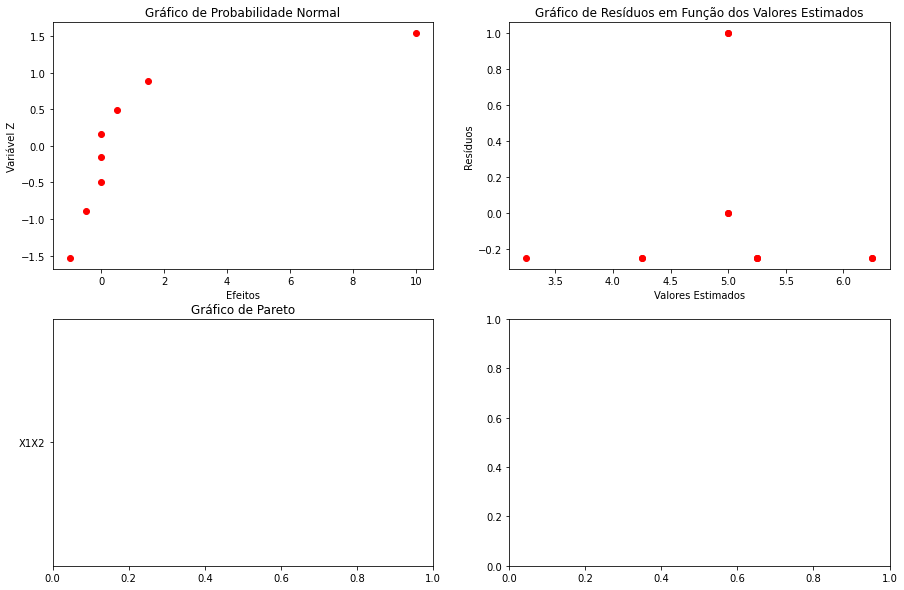

In [142]:
# Consideração dos Betas com Significância

#print(matbetas.size)
mem_matbetas = matbetas
elim_betas = 0
while elim_betas == 0:
    perg_betas = input('\nDeseja desconsiderar um beta do modelo?(s/n) ')
    if perg_betas == 's':
        beta_retirado = int(input('\nQual o  índice do beta a ser desconsiderado? '))
        if beta_retirado > 0 and beta_retirado < matbetas.size:
            matbetas[beta_retirado] = 0
    else:
        elim_betas = 1

# Calculo da Matriz Y^
matY_ = np.matmul(matx, matbetas)
#print('\n\n', maty_)

# Calculo da Tabela de ANOVA
sqereg = np.sum((matY_ - maty.mean()) ** 2)
#print('SQE Regressão: ', sqereg)
mat_sqe = (maty - matY_) ** 2
sqe = np.sum(mat_sqe)
#print('SQE: ', sqe)
mat_sqfaltaajuste = mat_sqe
media_repeticao = np.sum(maty[mat_sqe.size - replicadas:mat_sqe.size]) / replicadas
#print(media_repeticao)
for i in range(mat_sqe.size - replicadas, mat_sqe.size):
    mat_sqfaltaajuste[i] = (matY_[i] - media_repeticao) ** 2
sqfaltaajuste = np.sum(mat_sqfaltaajuste)
#print(sqfaltaajuste)

mat_sqerropuro = mat_sqe
for i in range(mat_sqerropuro.size):
    if i < mat_sqerropuro.size - replicadas:
        mat_sqerropuro[i] = 0
    else:
        mat_sqerropuro[i] = (maty[i] - media_repeticao) ** 2
sqerropuro = np.sum(mat_sqerropuro)

font_var = np.array(['Regressão', 'Resíduos', 'Falta Ajuste', 'Erro Puro'])
num_gl = np.array([matbetas.size - 1, 2 ** fatores + replicadas - matbetas.size, 2 ** fatores + 1 - matbetas.size, replicadas - 1])
somaquad = np.array([sqereg, sqe, sqfaltaajuste, sqerropuro])
mediaquad = somaquad / num_gl
fcalc = np.empty(4)
fcalc[0:2] = mediaquad[0] / mediaquad[1]
fcalc[2:] = mediaquad[2] / mediaquad[3]
fcrit = np.empty(4)
fcrit[0:2] = f.interval(1 - 2 * alfa, num_gl[0], num_gl[1])[1]
fcrit[2:] = f.interval(1 - 2 * alfa, num_gl[2], num_gl[3])[1]
f_aceitacao = np.empty(4).astype(str)
if fcalc[0] > fcrit[0]:
    f_aceitacao[:2] = 'Modelo Signif.'
else:
    f_aceitacao[:2] = 'Modelo Não Signif.'

if fcalc[2] > fcrit[2]:
    f_aceitacao[2:] = 'Não falta ajustes'
else:
    f_aceitacao[2:] = 'Falta ajustes'

f_pvalor = np.zeros(4)
f_pvalor[:2] = f.sf(fcalc[0], num_gl[0], num_gl[1])
f_pvalor[2:] = f.sf(fcalc[2], num_gl[2], num_gl[3])

tab_anova = DataFrame(
    {
        'Fonte Variação': font_var,
        'Soma Quadrática': somaquad,
        'GL': num_gl,
        'Média Quadrática': mediaquad,
        'F Calculado': fcalc,
        'F Crítico': fcrit,
        'Julgamento': f_aceitacao,
        'p-valor': f_pvalor
    }
)

print('\nTABELA DE ANOVA\n', '=-=' * 30)
display('\n', tab_anova)

matefeitos = matbetas * 2
print(matefeitos)
efeitos = np.sort(matefeitos, axis=0)
print('\n', efeitos)

fator = 1 / matbetas.size
print(fator)

print(matbetas.size)
pm = np.empty((matbetas.size, 1))
for i in range(matbetas.size):
    if i == 0:
        pm[i, 0] = (fator / 2)
    else:
        pm[i, 0] = (pm[i-1] + fator)
print(pm)

mat_z = norm.ppf(pm)
print(mat_z)

figura1, graf_normal = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
graf_normal[0, 0].set_title("Gráfico de Probabilidade Normal")
graf_normal[0, 0].plot(efeitos, mat_z, "ro")
graf_normal[0, 0].set_xlabel("Efeitos")
graf_normal[0, 0].set_ylabel("Variável Z")
graf_normal[0, 0].set_adjustable("box", share=True)

graf_normal[0, 1].set_title('Gráfico de Resíduos em Função dos Valores Estimados')
graf_normal[0, 1].plot(matY_, maty - matY_, "ro")
graf_normal[0, 1].set_xlabel('Valores Estimados')
graf_normal[0, 1].set_ylabel('Resíduos')

variaveis = np.array(['Média', 'X1', 'X2', 'X1X2'])
'''
for i in range(k):
    if i == 0:
        variaveis.append('Média')
    else:
        kaux = list()
        for j in range(i):
            kaux.append(str(j + 1))
        variaveis.append(combinations(kaux))
'''
graf_normal[1, 0].set_title("Gráfico de Pareto")
graf_normal[1, 0].barh(variaveis[::-1], tcalc[::-1])
graf_normal[1, 0].vlines(tcrit, -0.5, (tcalc.size + 0.5), linestyles='dotted', lw=3, colors='r')

plt.show()

fim = input('\nAperte ENTER para finalizar o programa...')

print("")


